# Importing the Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("baseball.csv")
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
data.shape

(30, 17)

In [6]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Documentation:-

Here I can see that most of the columns are having "int" datatype and a column "ERA" is with "float" datatype.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Documentation:-
    
Here I can see that there are no empty or null-values in any of the columns.

# Statistical Analysisof the data:

In [8]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Documentation:-
    
1. Here I can see that there no null - values in the columns which I can see in the row "Count"

2. Also All the columns are having good difference between "mean and std" but a column "CG" is having low difference between mean and std .

In [10]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [11]:
data.isnull().sum().sum()

0

# Finding null/missing values if any:

In [12]:
data.isnull().values.any()

False

Documentation:-

Here I can see that there are also no missing values.

# Plotting Heatmap fpr the Null Values : 

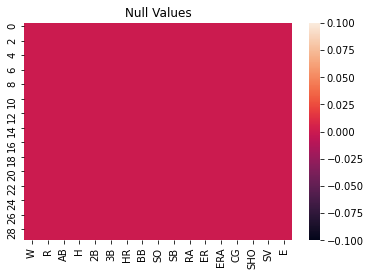

In [13]:
sns.heatmap(data.isnull())
plt.title("Null Values")
plt.show()

Documentation:-

I can see that there are no null - values can be seen in visualization.

# Exploratory Data Analysis(EDA):

## Checking the correlation of the variables by plotting Heatmap:

In [14]:
correlation = data.corr()

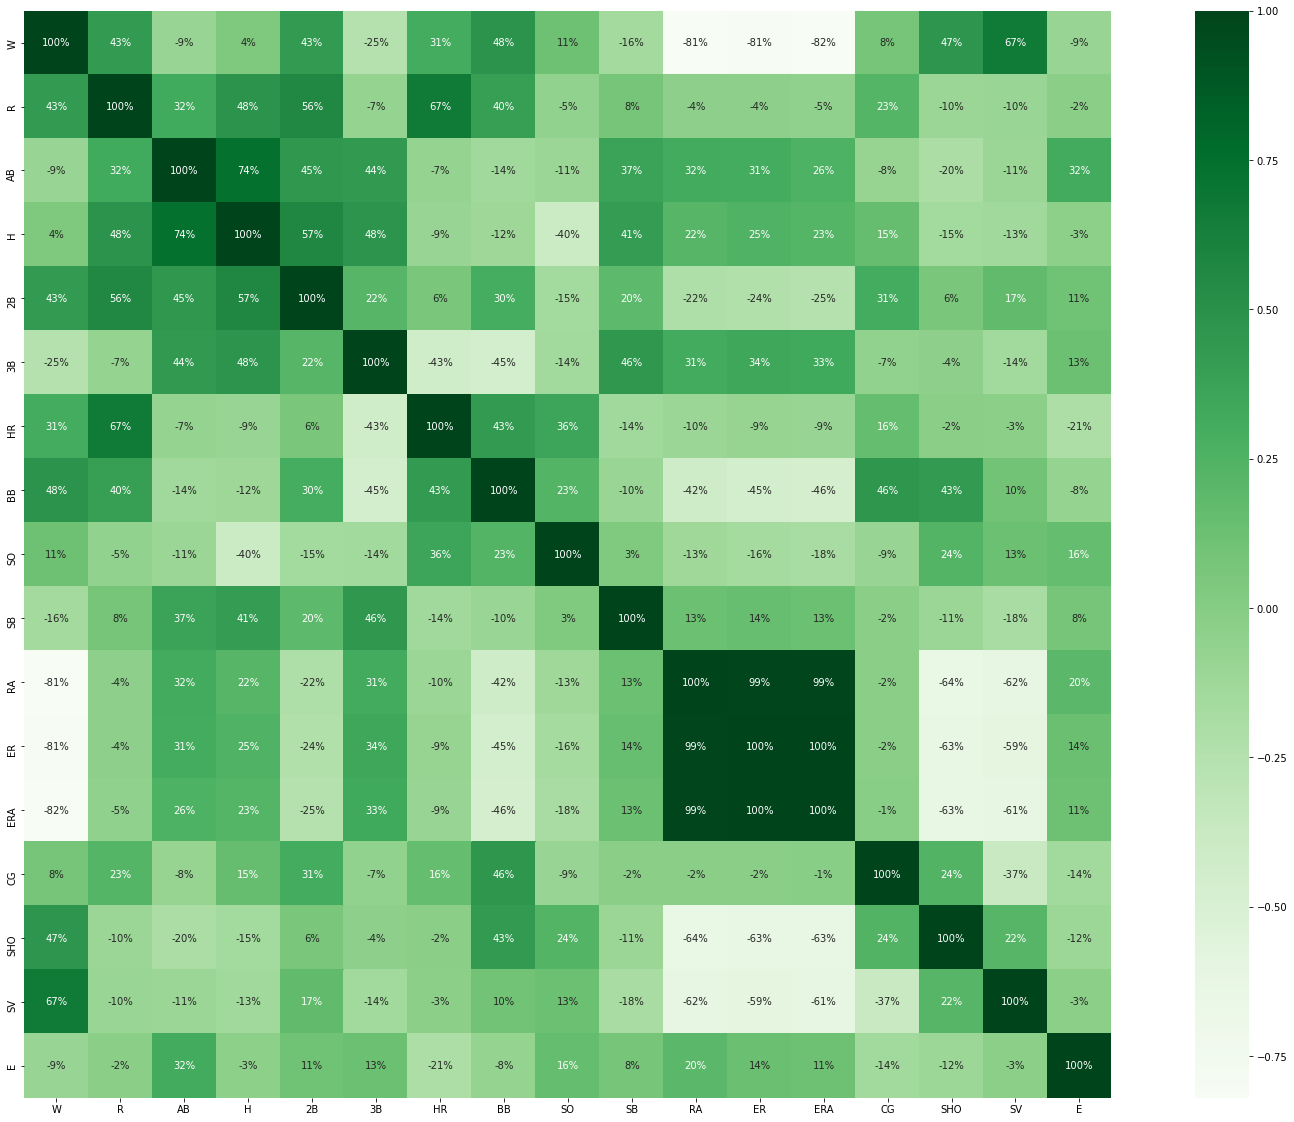

In [16]:
plt.figure(figsize =(30,20))
sns.heatmap(correlation,annot = True,fmt = ".0%",cbar = True,square = True,annot_kws = {'size': 10}, cmap = 'Greens')
plt.show()

Documentation:-

I can see that there is high correlation between "ER and RA","ERA and RA" and the next highest correlation is in between "AB and H". 

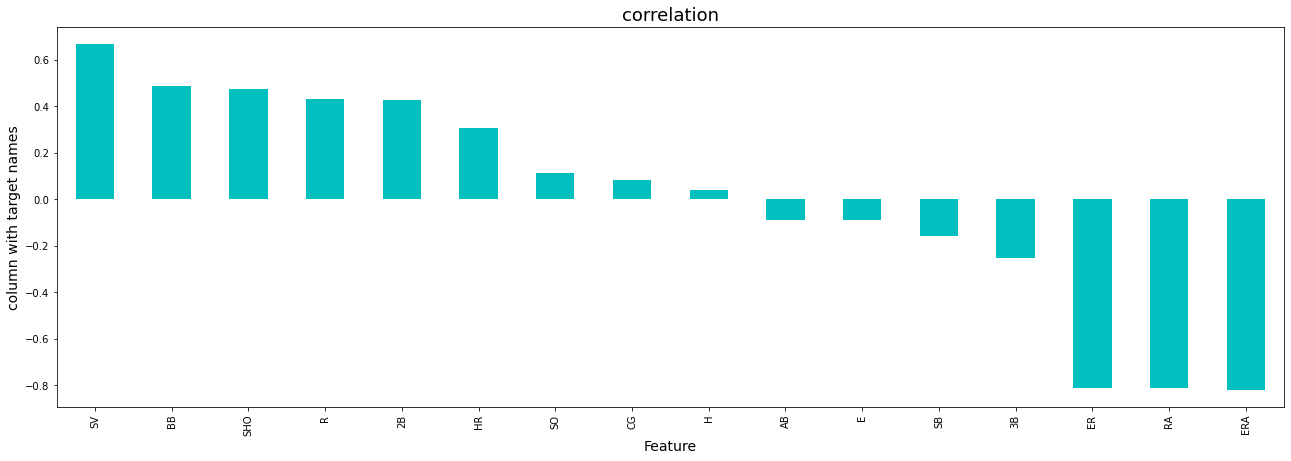

In [23]:
plt.figure(figsize=(22,7))
correlation['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Documentation:-
    
1. Here I can see that almost same correlation exists between "ER","RA","ERA".
2. I can see that very low correlation exists in "H".

# Visualization of the data:

## Univariate Analysis:

In [24]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# R - "Runs":

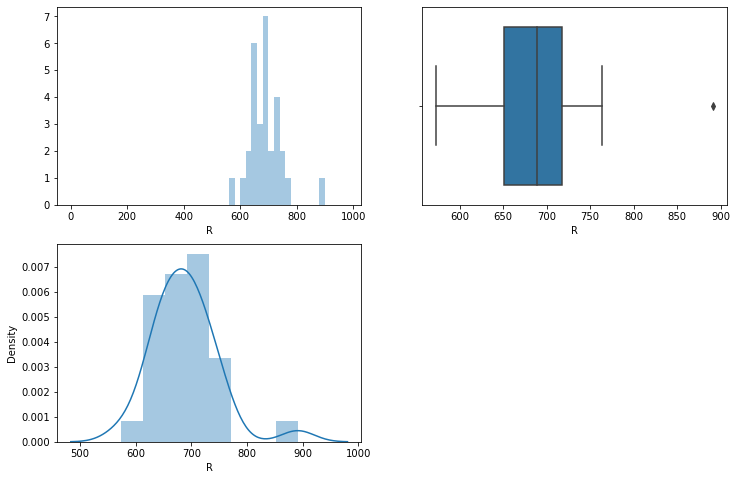

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['R'], kde=False, bins=range(0, 1000, 20));
plt.subplot(2,2,2)
sns.boxplot(data['R']);
plt.subplot(2,2,3)
sns.distplot(data['R']);

Documentation:-
    
1. Here I can see that there is an outlier which can be seen in the boxplot and is very far from max-quantile range and so probably it has no affect on our model building.

2. I can see that the distribution curve is skewed towards right and bell-shaped curve also can be seen.

# AB - "At Bats":

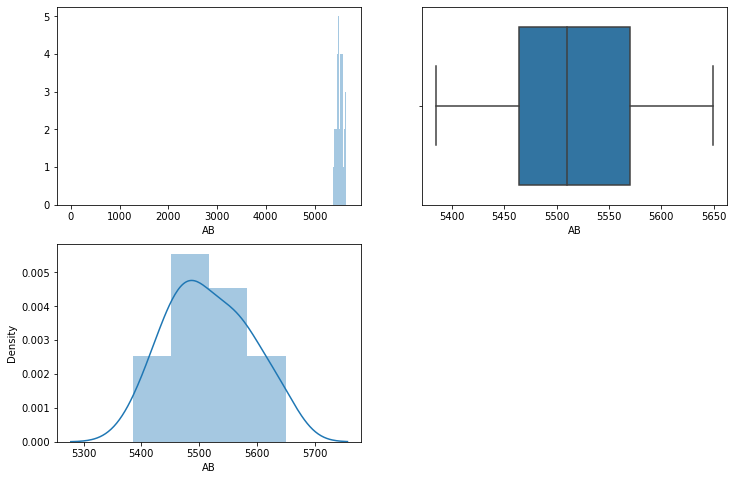

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['AB'], kde=False, bins=range(0, 5700, 25));
plt.subplot(2,2,2)
sns.boxplot(data['AB']);
plt.subplot(2,2,3)
sns.distplot(data['AB']);

Documentation:-
    
1. Here I can see that there are no outliers present or can be seen in boxplot.

2. I can see that there is no such skewness can be seen in the distribution curve.

# H - "Hits":

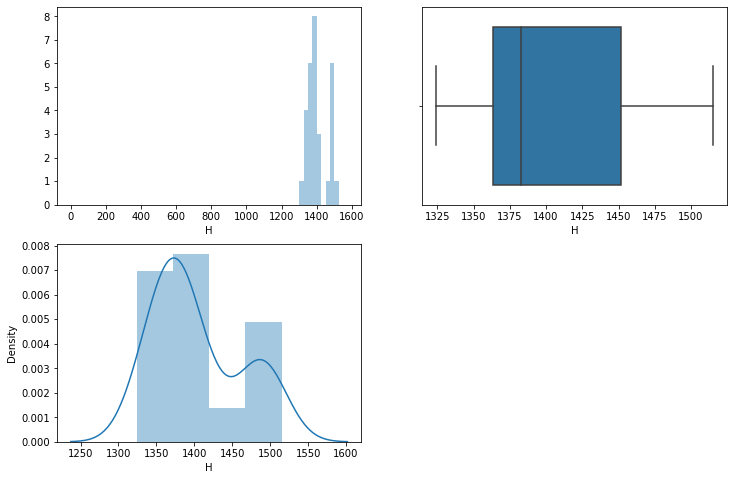

In [31]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['H'], kde=False, bins=range(0, 1600, 25));
plt.subplot(2,2,2)
sns.boxplot(data['H']);
plt.subplot(2,2,3)
sns.distplot(data['H']);

Documentation:-
    
1. Here I can see that there are no outliers which can be seen in boxplot.

2. I can see that the distribution curve is not at all distributed normally.

# 2B - "Doubles":

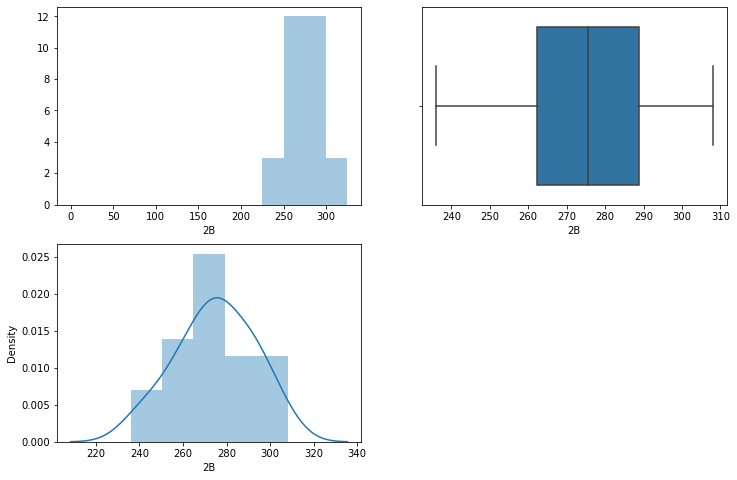

In [33]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['2B'], kde=False, bins=range(0,340, 25));
plt.subplot(2,2,2)
sns.boxplot(data['2B']);
plt.subplot(2,2,3)
sns.distplot(data['2B']);

Documentation:-
    
1. Here I can see that there are no outliers present or can be seen in the boxplot
2. Also the distribution curve seems to be normally distributed.

# 3B - "Triples":

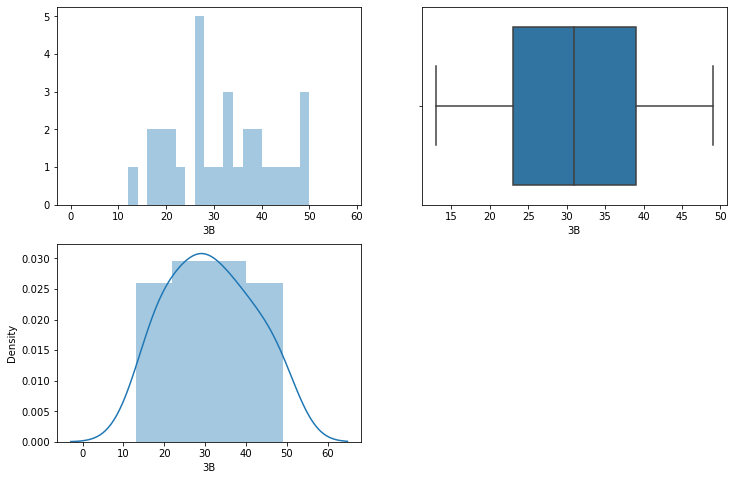

In [35]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['3B'], kde=False, bins=range(0, 60, 2));
plt.subplot(2,2,2)
sns.boxplot(data['3B']);
plt.subplot(2,2,3)
sns.distplot(data['3B']);

Documentation:-
    
1. Here I can see that there are no outliers present or can be seen in the boxplot
2. Also the distribution curve seems to be normally distributed.

# HR - "Homeruns":

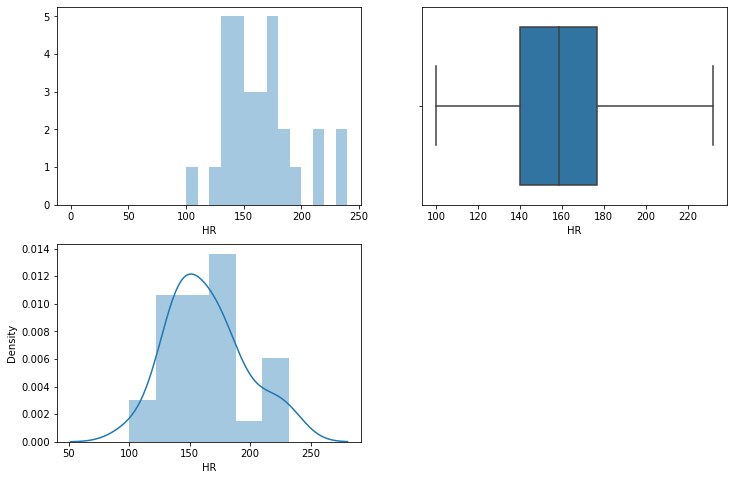

In [37]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['HR'], kde=False, bins=range(0, 250, 10));
plt.subplot(2,2,2)
sns.boxplot(data['HR']);
plt.subplot(2,2,3)
sns.distplot(data['HR']);

Documentation:-
    
1) Here I can see that there are no outliers present or can be seen in the boxplot.

2) Also the distribution curve can be seen skewed somewhat to the right side.

# BB - "Base on balls" or "Walks":

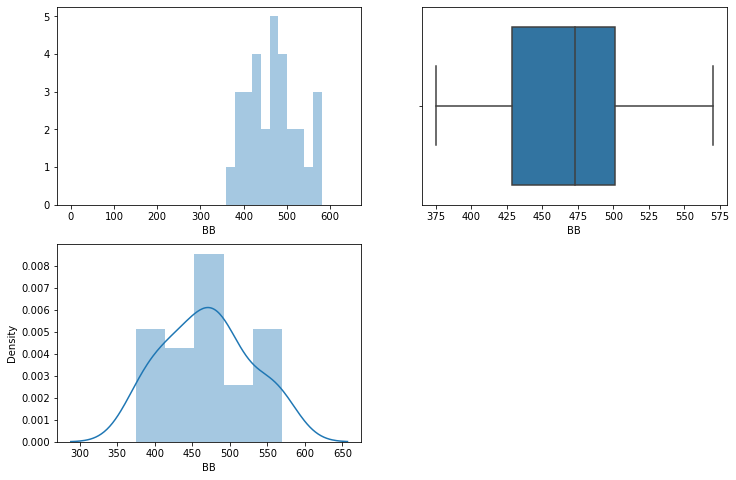

In [39]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['BB'], kde=False, bins=range(0, 650, 20));
plt.subplot(2,2,2)
sns.boxplot(data['BB']);
plt.subplot(2,2,3)
sns.distplot(data['BB']);

Documentation:-
    
1) Here I can see that there are no outliers present or can be seen in the boxplot

2) Also the distribution curve seems to be normally distributed.

# SO - "StrikeOuts":

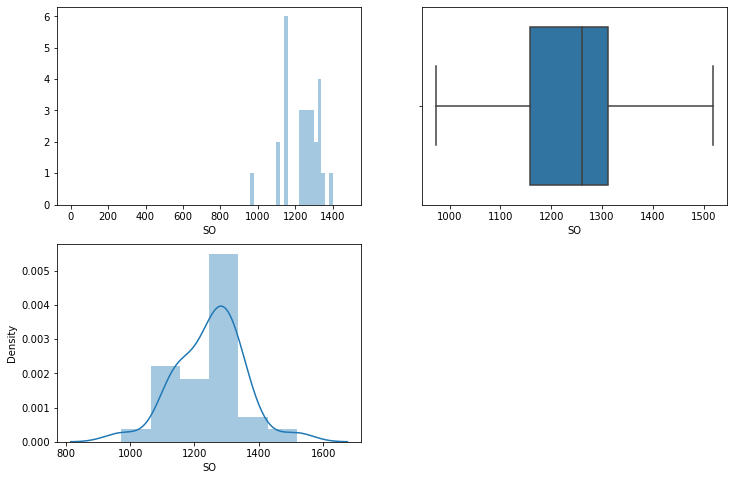

In [40]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['SO'], kde=False, bins=range(0, 1500, 20));
plt.subplot(2,2,2)
sns.boxplot(data['SO']);
plt.subplot(2,2,3)
sns.distplot(data['SO']);

Documentation:-
    
1) Here I can see that there are no outliers can be in the boxplot.

2) Also can be seen that the distribution curve is not at all distributed normally.

# SB - "Stolen Bases":

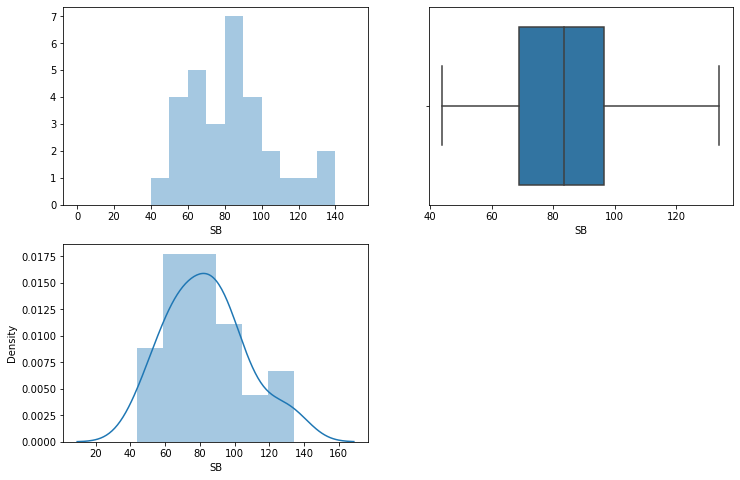

In [43]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['SB'], kde=False, bins=range(0, 160, 10));
plt.subplot(2,2,2)
sns.boxplot(data['SB']);
plt.subplot(2,2,3)
sns.distplot(data['SB']);

Documentation:-
    
1) Here I can see there are no outliers present or can be seen in the boxplot.

2) Also can be seen that the distribution curve is somewhat skewed.

# RA - "Runs Allowed": 

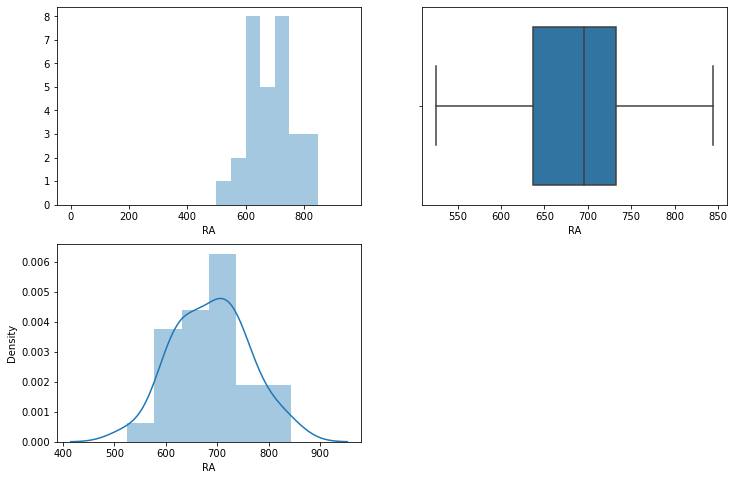

In [44]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['RA'], kde=False, bins=range(0, 1000, 50));
plt.subplot(2,2,2)
sns.boxplot(data['RA']);
plt.subplot(2,2,3)
sns.distplot(data['RA']);

Documentation:-
    
1) Here I can see that there are no outliers which can be seen in boxplot.

2) Also I can see that the distribution curve is probably distributed  normally but with less broad peak.

# ER - "Earned Runs":

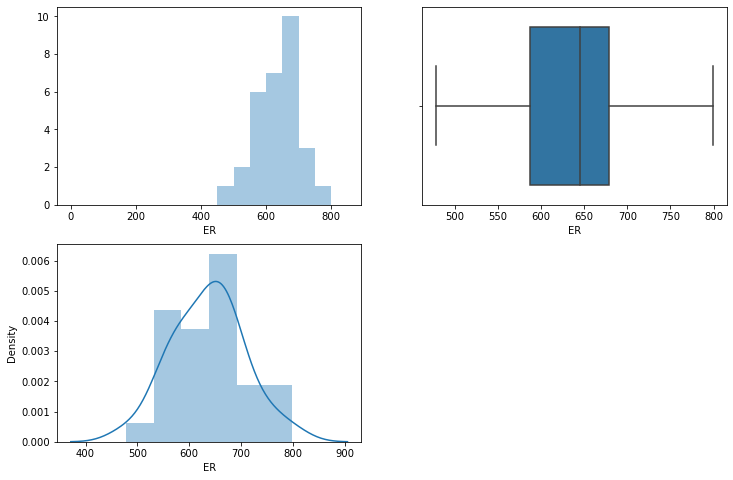

In [46]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['ER'], kde=False, bins=range(0, 900, 50));
plt.subplot(2,2,2)
sns.boxplot(data['ER']);
plt.subplot(2,2,3)
sns.distplot(data['ER']);

Documentation:-

Here I can see that there are no outliers present in the boxplot and also we can see that the distribution curve seems to be same as "RA".

# ERA - "Earned Run Average":

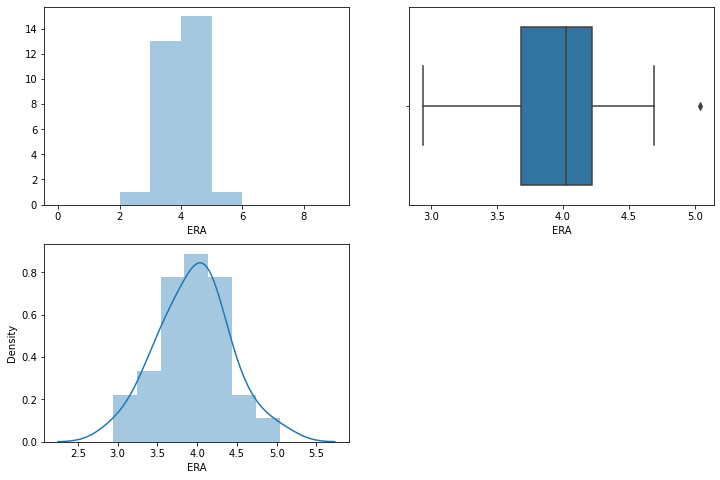

In [48]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['ERA'], kde=False, bins=range(0, 10, 1));
plt.subplot(2,2,2)
sns.boxplot(data['ERA']);
plt.subplot(2,2,3)
sns.distplot(data['ERA']);

Documentation:-

Here I can see that there is an outlier present or can be seen in boxplot same as "R"  and also the distribution curve is distributed normally but the peak is not at all broad.

# CG - "Complete Games":

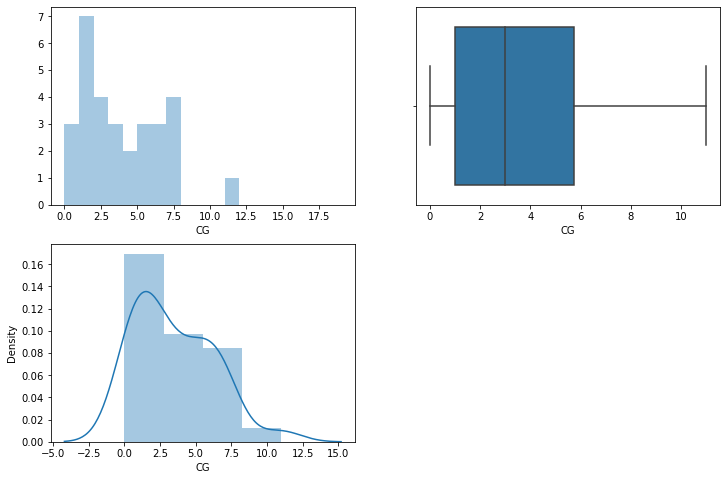

In [49]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['CG'], kde=False, bins=range(0, 20, 1));
plt.subplot(2,2,2)
sns.boxplot(data['CG']);
plt.subplot(2,2,3)
sns.distplot(data['CG']);

Documentation:-
    
Here we can see that there are no outliers can be seen in boxplot and also we can see that the distribution curve is not at all normally distributed.

# SHO - "Shutouts":

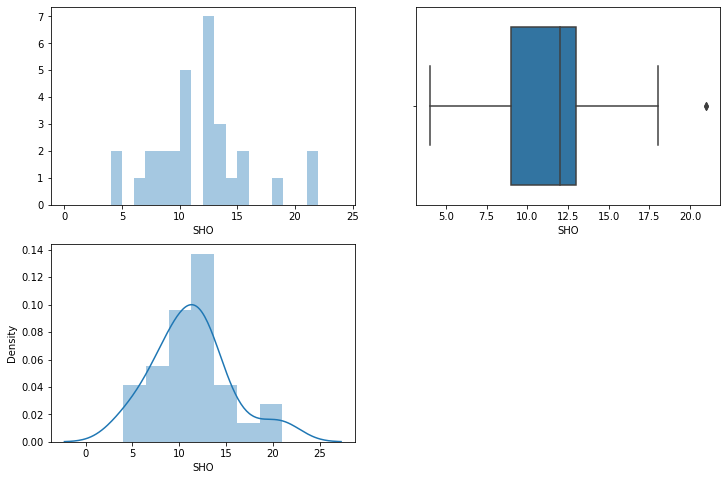

In [51]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['SHO'], kde=False, bins=range(0, 25, 1));
plt.subplot(2,2,2)
sns.boxplot(data['SHO']);
plt.subplot(2,2,3)
sns.distplot(data['SHO']);

Documentation:-
    
Here we can see that there is an outlier present in the boxplot same as R and ERA but is very far away from max-qu--artile and the distribution curve seems to be skewed slightly towards rightside.

# SV - "Saves":

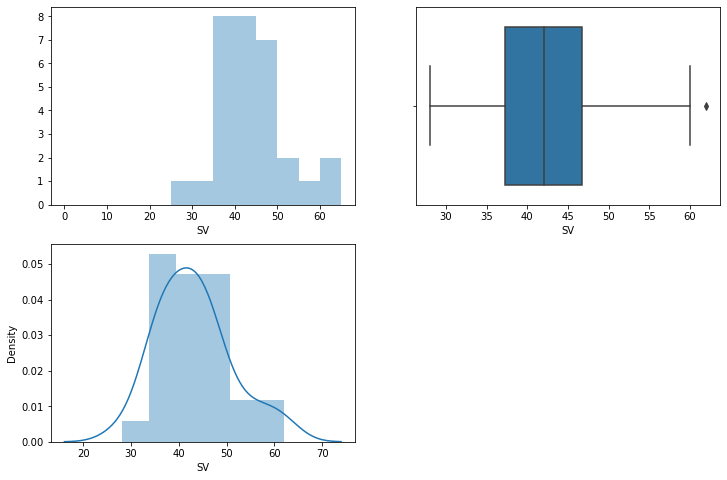

In [52]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['SV'], kde=False, bins=range(0, 70, 5));
plt.subplot(2,2,2)
sns.boxplot(data['SV']);
plt.subplot(2,2,3)
sns.distplot(data['SV']);

Documentation:-
    
Here we can see that there is an outlier present which is seen near to the max-quartle and the distribution curve is skewed somewhat towards right.

# E - "Errors":

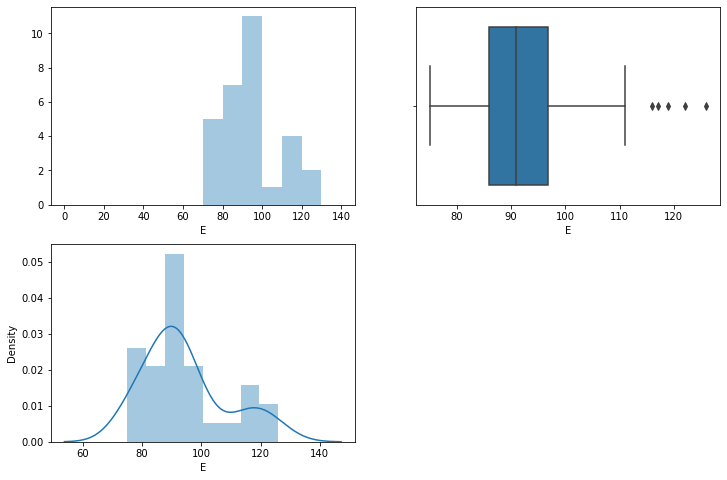

In [53]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['E'], kde=False, bins=range(0, 150, 10));
plt.subplot(2,2,2)
sns.boxplot(data['E']);
plt.subplot(2,2,3)
sns.distplot(data['E']);

Documentation:-
    
Here we can see that there are outliers present in the boxplot and are near to max-quartle and the distribution curve is not at all skewed and probably these outliers may effect our model building.

Documentation:- Here we can see that the columns "R","RA","ERA","SV","E" and the major outliers which has possibility to affect our model building is "E" and the outliers of the other columns are far enough from the max-quartile and there is very chance chance of their effect on our model building.

Here we have plotted the graphs and alsodetedted the outliers present and so now we will treat the outliers in the column "E".

# Removal of outliers through "Z - Score - Method": 

In [54]:
from scipy.stats import zscore
z = np.abs(zscore(data))
z.shape

(30, 17)

In [55]:
threshold = 3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [57]:
data_new = data[(z<3).all(axis = 1)]
print(data.shape)
print(data_new.shape)

(30, 17)
(29, 17)


Documentation:-

Here we can see that there is reduce in the number of total records(rows) and so there is reduce in the data.

# Loss Percentage Calculation:

In [58]:
loss_percent = (30-29)/30*100
print(loss_percent)

3.3333333333333335


Documentation:-
    
Here we can see that there is loss of 3.3% of the data , so it is negligible.

In [60]:
data_new.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


Documentation:-
    
Here we can see that there is reduction in the number of records which means outliers are treated.

# IQR method:

In [61]:
feature1 = data[['E']]
feature2 = feature1
feature2 = data["R"]
feature3 = feature2
feature3 = data["SHO"]
feature4 = feature3
feature4 = data["SV"]
features = feature4

In [64]:
Q1 = features.quantile(0.25)  # 1st quantile

Q3 = features.quantile(0.75)  # 3rd quantile

IQR = Q3-Q1

data_removed = data[~((data <(Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [65]:
data_removed.shape

(0, 17)

Documentation:-
    
Here also we have tried to remove outliers from the dataset but we are not able to remove the outliers as the number of records removed can be seen as "0", so we will consider Z - Score method itself here.

# Finding Skewness in the data:

In [66]:
data_new.shape

(29, 17)

In [67]:
data_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Documentation:-
    
Here we can see that the skewness is present or can be seen in the columns : "SV" and "E"

In [69]:
data_new['SV'] = np.sqrt(data_new ['SV'])

In [71]:
data_new['E'] = np.sqrt(data_new ['E'])


In [72]:
data_new['CG'] = np.sqrt(data_new ['CG'])


In [73]:
data_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -1.526584
SHO    0.526943
SV     0.370280
E      0.714966
dtype: float64

Documentation:-
    
Here we can see that there is reduction in the skewness of the columns which are highly skewed before.

# Data Preprocessing:

## Separating the independent and the dependent variables into x and y:

In [74]:
x = data_new.drop("W", axis=1)
y = data_new["W"]

In [75]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,1.189207,8,7.483315,9.380832
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,1.189207,12,6.708204,9.273618
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,1.821160,10,6.164414,8.888194
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,1.626577,9,6.082763,10.049876
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,1.626577,12,5.916080,9.273618


In [76]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

# Scaling the data with Standard Scaler:

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,0.005269,-0.813262,1.602631,-0.454325
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.005269,0.159299,0.255621,-0.607619
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.358886,-0.326982,-0.689393,-1.158698
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,0.942096,-0.570122,-0.831290,0.502274
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.942096,0.159299,-1.120956,-0.607619


# Model Building:

# Checking the random_state:

In [78]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8988088015889611  on Random_state  50


Documentation:-
    
Here we got the accuracy as 81.6% for the random_state = 62

## train_test_split:

## splitting the data at the "maxRs" = 62:

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

Documentation:-

Here we can see that the data is into 70% training and 30% testing.

# Linear regression:

In [80]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,predLR))

R2_score: 0.8988088015889611


Documentation:-

The R2 Score in Linear Regression is 81.6%

In [81]:
# Mean Absolute Error (MAE)

print(metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predLR)))

3.197467086960308
14.521561609011302
3.810716679184022


# Random Forest Regressor:

In [82]:
#Checking R2 score for Random Forest Regressor:

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predRFR))

R2_Score: 0.6679083620096352


Documentation:-
    
Here we can see that accuracy R2 Score is 71%

# Decision Tree Regressor:

In [83]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predDTR))

R2_Score: 0.08792154163799026


In [84]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predDTR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predDTR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

9.555555555555555
130.88888888888889
11.440668201153676


Documentation:-

Here we can see that accuracy R2 Score is 40.5%

# KNN Regressor:

In [85]:
# Checking R2 score for KNN regressor

knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predknn))

R2_Score: 0.538757742601514


In [86]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predknn))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predknn))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predknn)))


7.2666666666666675
66.19111111111113
8.135791978111973


Documentation:-
    
Here we can see that accuracy R2 Score is 66.7%

# Support Vector Regressor:

In [87]:
# Checking R2 score for KNN regressor
svr=SVR()
svr.fit(x_train,y_train)

#prediction
predsvr=svr.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predsvr))

R2_Score: 0.13325493874946004


In [88]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predsvr))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predsvr))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

10.084508331810246
124.38326656760835
11.152724625292617


Documentation:-
    
Here we can see that accuracy R2 Score is 13%

# Checking the Cross Validation Score:

In [89]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=10).mean())

-2.7520519651666087


In [90]:
# Checking cv score for Random Forest Regression
print(cross_val_score(RFR,x,y,cv=5).mean())

-0.5541392569180053


In [91]:
# Checking cv score for Decision Tree Regression
print(cross_val_score(DTR,x,y,cv=5).mean())

-2.464329128000094


In [92]:
# Checking cv score for KNN Regression
print(cross_val_score(knn,x,y,cv=5).mean())

0.03447535301700129


In [93]:
# Checking cv score for SVR Regression
print(cross_val_score(svr,x,y,cv=5).mean())

-0.29905280940552526


Documentation:-
    
Here we can see that there are the R2 Score is high for "Linear Regression" and so we can consider this model as "best fitting model".

# Hyper Parameter Tuning:

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [96]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=None)

In [97]:
GCV.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [98]:
print (" variance : ", GCV.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((GCV.predict(x_test) - y_test) ** 2))

 variance :  -34.54313231887367
Residual sum of squares: 14.52


Documentation:-
    
Linear regression is with good accuracy without doing :Grid Search CV".

# Saving the model:

In [99]:
import pickle
filename='W.pkl'
pickle.dump(LR,open(filename,'wb'))

# Conclusion:

In [100]:
loaded_model=pickle.load(open('W.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8988088015889611


In [101]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [102]:
conclusion

,0,1,2,3,4,5,6,7,8
Predicted,67.842952,81.279223,78.944147,89.016651,73.173767,63.050683,89.448481,85.862636,93.431833
Original,55.110495,50.976561,87.962387,77.920768,96.308040,105.223523,106.811083,89.592412,99.439055


Therefore our best model is "Linear Regression" with the accuracy of 81.6%